<img src="https://studenthub.atu.ie/assets/ATU_Logo.fa93bf0a.svg" alt="ATU Logo" width="300" height="100">

# **Project for 2024 Programming for Data Analytics (PFDA) module.**

# **1.0 Irish Weather**
## 1.1 Introduction / About this project
This is the project for the 2024 Programming for Data Analytics (PFDA) module. A description of the project can be found [here](https://github.com/andrewbeattycourseware/PFDA-courseware/blob/main/labs/Project%20Description.pdf). Initially, I was going to do a project on aviation but struggled to find usable datasets that were free of charge. Since we so often talk about the weather here in Ireland due to its erratic nature, I decided to explore it through analytics, touching upon as many suggestions as possible as per the project brief.

## 2.0 Imported libraries & modules:

### 2.1 [Pandas](https://pandas.pydata.org/) for data frames:
A fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language. 
### 2.2 [Matplotlib](https://matplotlib.org/stable/) for plotting:
A comprehensive library for creating static, animated, and interactive visualizations.
### 2.3 [Seaborn](https://seaborn.pydata.org/)
Seaborn: statistical data visualization.
### 2.4 [Numpy](https://numpy.org/)
The fundamental package for scientific computing with Python.

In [270]:
# Data frames.
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np

## 3.0 Athenry weather station.
For the final assignment of the module, we analyzed the weather station in Athenry, which I have chosen to use again. This station records a diverse range of data points, as listed below in 5.0. Unfortunately, the Circular Road station, which is closest to where I live, and the station in Oughterard, do not include temperature measurements, for example. The data was downloaded from this website: https://www.met.ie/climate/available-data/historical-data.

### 4.0 Load the dataset.
The dataset is loaded from the local location specified by the *file_path* variable using *pandas.read_csv()*.

In [271]:
# Load the data sets.
file_path = r"C:\Users\User\ATU\PFDA\Project\mly1875.csv"
df = pd.read_csv(file_path, on_bad_lines='skip')

### 5.0 Explore dataset
The next step is a detailed exploration of the dataset's variables and attributes.

In [272]:
df

,Station Name: ATHENRY
0,Station Height: 40 M
1,year: - Year
2,month: - Month
3,rain: - Precipitation Amount (mm)
4,meant: - Mean Air Temperature (C)
5,maxtp: - Maximum Air Temperature (C)\t
6,mintp: - Minimum Air Temperature (C)\t
7,mnmax: - Mean Maximum Temperature (C)
8,mnmin: - Mean Minimum Temperature (C)
9,gmin: - Grass Minimum Temperature (C)


In [273]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Station Name: ATHENRY  14 non-null     object
dtypes: object(1)
memory usage: 244.0+ bytes
None


In [274]:
print(df.head(25))

                        Station Name: ATHENRY
0                       Station Height: 40 M 
1                              year:  -  Year
2                             month: -  Month
3         rain:  -  Precipitation Amount (mm)
4          meant: -  Mean Air Temperature (C)
5   maxtp: -  Maximum Air Temperature (C)\t  
6    mintp: -  Minimum  Air Temperature (C)\t
7      mnmax: -  Mean Maximum Temperature (C)
8      mnmin: -  Mean Minimum Temperature (C)
9     gmin:  -  Grass Minimum Temperature (C)
10           wdsp:  -  Mean Wind Speed (knot)
11              mxgt:  -  Highest Gust (knot)
12        sun:   -  Sunshine duration (hours)
13                        ind:   -  Indicator


The three functions provided the same information, albeit in different output formats. Intriguingly, the last function, designed to display the first 25 records of the dataset, unexpectedly only returned the header data (We'll get to that below). However, we do learn the station's name, altitude, and 13 available data parameters, each presented with both its abbreviation and full name.

### 5.1 Cleaning the dataset.
Since this dataset was used for an assignment previously we knew that the data had to be normalized. This is the reason why even though we have used *print(df.head(25))* above the output wouldn't reflect the first 25 records because the csv values do start in row 20 only. So let's skip the first 20 rows.


In [275]:
df = pd.read_csv(file_path, skiprows=19)

df

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
0,2010,3,5.5,13.9,-5.7,9.9,1.1,73.3,-6.4,6.8,45,
1,2010,4,8.8,18.5,-1.8,13.8,3.9,76.8,-2.3,6.3,40,
2,2010,5,10.4,24.5,0.2,15.6,5.2,38.4,-0.3,6.1,28,
3,2010,6,14.7,22.1,4.3,19.5,9.9,28.3,3.6,6.6,28,
4,2010,7,15.1,20.0,6.9,18.2,12.0,155.5,7.3,7.7,37,
...,...,...,...,...,...,...,...,...,...,...,...,...
172,2024,7,14.6,22.2,6.3,19.0,10.3,71.5,3.6,5.9,26,
173,2024,8,14.7,21.7,5.8,18.4,11.0,159.0,2.4,7.6,33,
174,2024,9,12.9,24.0,2.1,17.0,8.7,46.6,-0.2,6.5,33,
175,2024,10,11.0,19.1,-0.5,14.8,7.1,112.7,-2.8,6.7,51,


In [276]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    177 non-null    int64  
 1   month   177 non-null    int64  
 2   meant   177 non-null    float64
 3   maxtp   177 non-null    float64
 4   mintp   177 non-null    float64
 5   mnmax   177 non-null    float64
 6   mnmin   177 non-null    float64
 7   rain    177 non-null    object 
 8   gmin    177 non-null    object 
 9   wdsp    177 non-null    float64
 10  maxgt   177 non-null    int64  
 11  sun     177 non-null    object 
dtypes: float64(6), int64(3), object(3)
memory usage: 16.7+ KB
None


In [277]:
print(df.head(25))

    year  month  meant  maxtp  mintp  mnmax  mnmin   rain   gmin  wdsp  maxgt  \
0   2010      3    5.5   13.9   -5.7    9.9    1.1   73.3   -6.4   6.8     45   
1   2010      4    8.8   18.5   -1.8   13.8    3.9   76.8   -2.3   6.3     40   
2   2010      5   10.4   24.5    0.2   15.6    5.2   38.4   -0.3   6.1     28   
3   2010      6   14.7   22.1    4.3   19.5    9.9   28.3    3.6   6.6     28   
4   2010      7   15.1   20.0    6.9   18.2   12.0  155.5    7.3   7.7     37   
5   2010      8   13.6   23.0    1.8   17.9    9.3   60.9    4.2   6.7     34   
6   2010      9   13.5   22.6    4.8   17.1   10.0  155.0    3.0   7.0     43   
7   2010     10    9.7   19.3   -3.1   13.9    5.6   71.9   -3.8   7.0     36   
8   2010     11    4.7   14.9   -7.5    8.1    1.2  130.1   -8.6   7.4     53   
9   2010     12   -1.0   11.5  -15.8    2.8   -4.7   32.3  -10.2   4.4     30   
10  2011      1    3.1   12.1   -6.3    6.6   -0.4  110.8   -9.9   5.7     37   
11  2011      2    6.4   14.

After excluding the initial 20 rows, the dataset comprises 177 rows and 12 columns. Data type analysis reveals 3 object columns, 3 integer columns (int64), and 6 float columns (float64).

In [278]:
print(df.tail(25))

     year  month  meant  maxtp  mintp  mnmax  mnmin   rain   gmin  wdsp  \
152  2022     11    8.8   16.4   -1.8   11.9    5.7  156.2   -6.3   7.5   
153  2022     12    3.4   13.4   -8.1    6.7    0.2  114.3  -11.7   5.8   
154  2023      1    6.0   13.0   -6.0    8.9    3.1  113.9  -11.3   7.2   
155  2023      2    7.3   14.4   -3.9   10.4    4.2   42.0   -8.1   7.7   
156  2023      3    7.3   15.6   -2.2   10.7    4.0  185.9   -6.5   7.4   
157  2023      4    9.2   20.4   -1.2   13.5    4.9   93.4   -6.4   7.1   
158  2023      5   12.6   23.1    1.6   17.5    7.7   63.5   -1.2   5.9   
159  2023      6   16.7   27.0    7.3   21.8   11.6   93.8    2.1   6.1   
160  2023      7   14.8   22.0    6.6   18.2   11.4  224.1    2.9   6.9   
161  2023      8   15.4   24.9    6.6   19.1   11.7  129.1    4.7   6.8   
162  2023      9   14.6   27.7    3.8   19.1   10.2  148.2    1.7   6.1   
163  2023     10   11.0   20.7   -0.3   14.7    7.4  179.9   -3.1   6.2   
164  2023     11    7.6  

The data frame spans from March 2010 to November 2024. To ensure a consistent time frame for analysis we will work with full years only, hence excluding data for 2010 & 2024.

In [279]:
df = df[df['year'].isin(range(2011, 2024))]
df

,year,month,meant,maxtp,mintp,mnmax,mnmin,rain,gmin,wdsp,maxgt,sun
10,2011,1,3.1,12.1,-6.3,6.6,-0.4,110.8,-9.9,5.7,37,
11,2011,2,6.4,14.2,-3.6,10.0,2.8,146.5,-6.0,7.7,48,
12,2011,3,6.3,16.3,-4.8,11.2,1.4,44.2,-7.9,6.0,52,
13,2011,4,11.0,21.8,2.0,15.9,6.0,66.9,-0.7,7.1,34,
14,2011,5,11.0,18.3,4.1,14.3,7.8,117.6,0.7,11.1,47,
...,...,...,...,...,...,...,...,...,...,...,...,...
161,2023,8,15.4,24.9,6.6,19.1,11.7,129.1,4.7,6.8,33,
162,2023,9,14.6,27.7,3.8,19.1,10.2,148.2,1.7,6.1,36,
163,2023,10,11.0,20.7,-0.3,14.7,7.4,179.9,-3.1,6.2,32,
164,2023,11,7.6,13.7,-3.8,10.8,4.5,113.5,-4.1,6.8,62,


In [280]:
print(df[['wdsp', 'rain', 'meant']].dtypes)

wdsp     float64
rain      object
meant    float64
dtype: object


## 6.0 Statistics.
### 6.1 Temperature statistics.

Calculate average temperature per year.

In [281]:
# Ensure the 'meant', 'maxtp', and 'mintp' columns are numeric.
df.loc[:, 'meant'] = pd.to_numeric(df['meant'], errors='coerce')
df.loc[:, 'maxtp'] = pd.to_numeric(df['maxtp'], errors='coerce')
df.loc[:, 'mintp'] = pd.to_numeric(df['mintp'], errors='coerce')

# Group by year and calculate the average temperature statistics.
temp_stats = df.groupby('year')[['meant', 'maxtp', 'mintp']].mean().reset_index()

print("Average Rainfall per Year:")
print(temp_stats)

Average Rainfall per Year:
    year      meant      maxtp     mintp
0   2011   9.775000  18.025000  0.708333
1   2012   9.525000  17.941667  0.066667
2   2013   9.625000  18.291667  0.550000
3   2014  10.041667  18.050000  0.850000
4   2015   9.358333  17.383333 -0.008333
5   2016   9.750000  18.600000  0.250000
6   2017   9.925000  18.158333  0.941667
7   2018   9.750000  19.216667 -1.025000
8   2019   9.825000  18.283333 -0.141667
9   2020   9.908333  18.766667 -0.175000
10  2021  10.225000  19.441667  0.391667
11  2022  10.266667  19.416667  0.358333
12  2023  10.800000  19.600000  0.291667


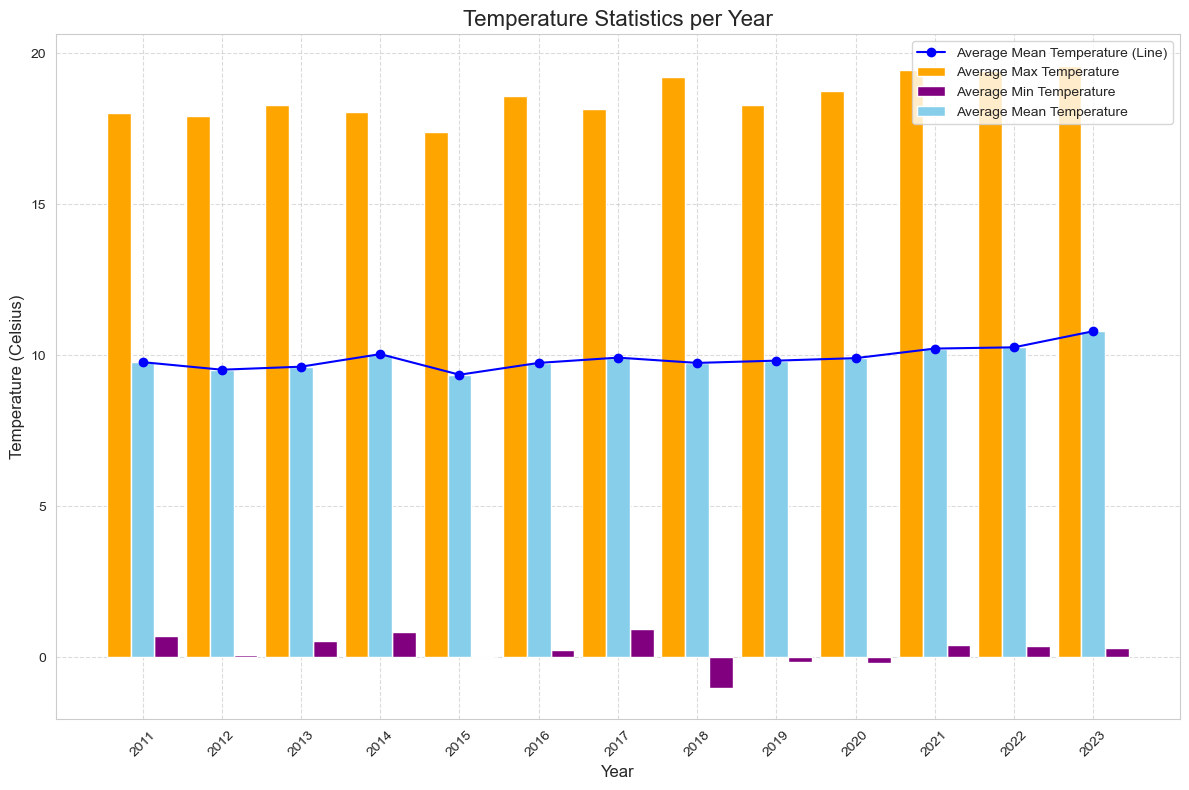

In [282]:
# Plot.
plt.figure(figsize=(12, 8))  # Set the figure size.

# Bar chart for max temperature.
plt.bar(temp_stats['year'] - 0.3, temp_stats['maxtp'], width=0.3, color='orange', label='Average Max Temperature')

# Bar chart for min temperature.
plt.bar(temp_stats['year'] + 0.3, temp_stats['mintp'], width=0.3, color='purple', label='Average Min Temperature')

# Bar chart for mean temperature.
plt.bar(temp_stats['year'], temp_stats['meant'], width=0.3, color='skyblue', label='Average Mean Temperature')

# Line chart for mean temperature.
plt.plot(temp_stats['year'], temp_stats['meant'], marker='o', color='blue', linestyle='-', label='Average Mean Temperature (Line)')

# Title and labels.
plt.title('Temperature Statistics per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature (Celsius)', fontsize=12)

# X-axis.
plt.xticks(temp_stats['year'], rotation=45)

# Legend.
plt.legend()

# Add a grid for better visualization.
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()

### 6.2 Windspeed statistics.
Calculate average windspeed per year.

In [283]:
# Ensure the 'wdsp' and 'mxgt' columns are numeric.
df.loc[:, 'wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')
df.loc[:, 'maxgt'] = pd.to_numeric(df['maxgt'], errors='coerce')

# Group by year and calculate the average temperature statistics.
wdsp_stats = df.groupby('year')[['wdsp', 'maxgt']].mean().reset_index()

print("Average Rainfall per Year:")
print(wdsp_stats)

Average Rainfall per Year:
    year      wdsp      maxgt
0   2011  7.866667  42.083333
1   2012  7.458333  37.750000
2   2013  7.691667  40.000000
3   2014  7.325000  38.000000
4   2015  7.808333  40.250000
5   2016  7.025000  37.166667
6   2017  7.158333  38.333333
7   2018  7.150000  40.583333
8   2019  7.200000  38.500000
9   2020  7.591667  43.333333
10  2021  6.566667  35.000000
11  2022  6.983333  37.333333
12  2023  6.916667  38.166667


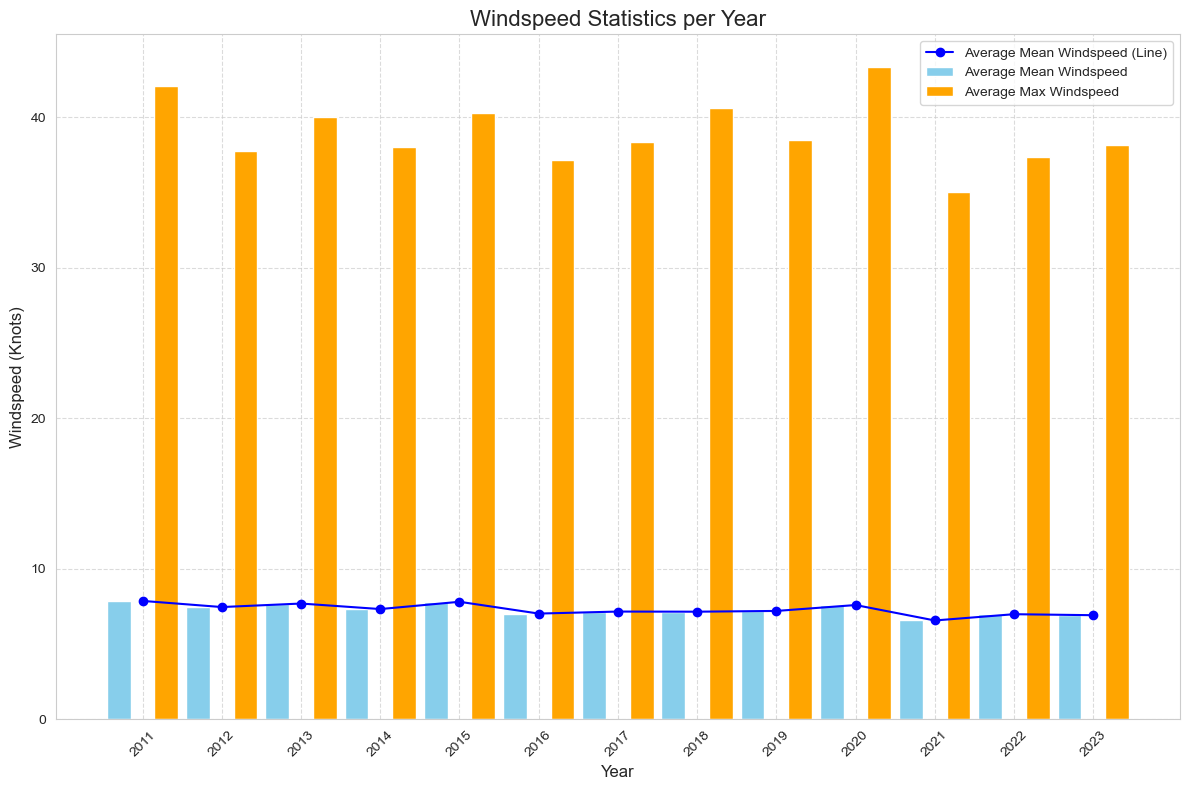

In [284]:
# Plot.
plt.figure(figsize=(12, 8))  # Set the figure size.

# Bar chart for max temperature.
plt.bar(wdsp_stats['year'] - 0.3, wdsp_stats['wdsp'], width=0.3, color='skyblue', label='Average Mean Windspeed')

# Bar chart for min temperature.
plt.bar(wdsp_stats['year'] + 0.3, wdsp_stats['maxgt'], width=0.3, color='orange', label='Average Max Windspeed')

# Line chart for mean temperature.
plt.plot(wdsp_stats['year'], wdsp_stats['wdsp'], marker='o', color='blue', linestyle='-', label='Average Mean Windspeed (Line)')

# Title and labels.
plt.title('Windspeed Statistics per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Windspeed (Knots)', fontsize=12)

# X-axis.
plt.xticks(wdsp_stats['year'], rotation=45)

# Legend.
plt.legend()

# Add a grid for better visualization.
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()

### 6.3 Rainfall statistics.
Calculate average rainfall per year.

In [285]:
# Ensure the 'rain' column is numeric.
df.loc[:, 'rain'] = pd.to_numeric(df['rain'], errors='coerce')

# Group by year and calculate average rainfall.
avg_rainfall_per_year = df.groupby('year')['rain'].mean().reset_index()

# Print the numeric output for each year's average rainfall.
print("Average Rainfall per Year:")
print(avg_rainfall_per_year)

Average Rainfall per Year:
    year        rain
0   2011  114.366667
1   2012  105.508333
2   2013   94.245455
3   2014  105.358333
4   2015  131.316667
5   2016   89.733333
6   2017       100.0
7   2018   90.183333
8   2019       118.9
9   2020  123.483333
10  2021   93.683333
11  2022   98.208333
12  2023  132.516667


In [286]:
# Group by year and calculate average, max, and min rainfall.
rainfall_stats = df.groupby('year')['rain'].agg(['mean', 'max', 'min']).reset_index()

# Print the numeric output for each year's rainfall statistics.
print("Rainfall Statistics per Year:")
print(rainfall_stats)

Rainfall Statistics per Year:
    year        mean    max   min
0   2011  114.366667  160.3  44.2
1   2012  105.508333  175.6  30.5
2   2013   94.245455  220.3  36.9
3   2014  105.358333  182.5  10.4
4   2015  131.316667  299.4  44.9
5   2016   89.733333  145.2  49.2
6   2017       100.0  157.7  13.5
7   2018   90.183333  173.2  25.2
8   2019       118.9  297.3  46.1
9   2020  123.483333  248.5  46.8
10  2021   93.683333  167.3  23.9
11  2022   98.208333  199.3  39.0
12  2023  132.516667  224.1  42.0


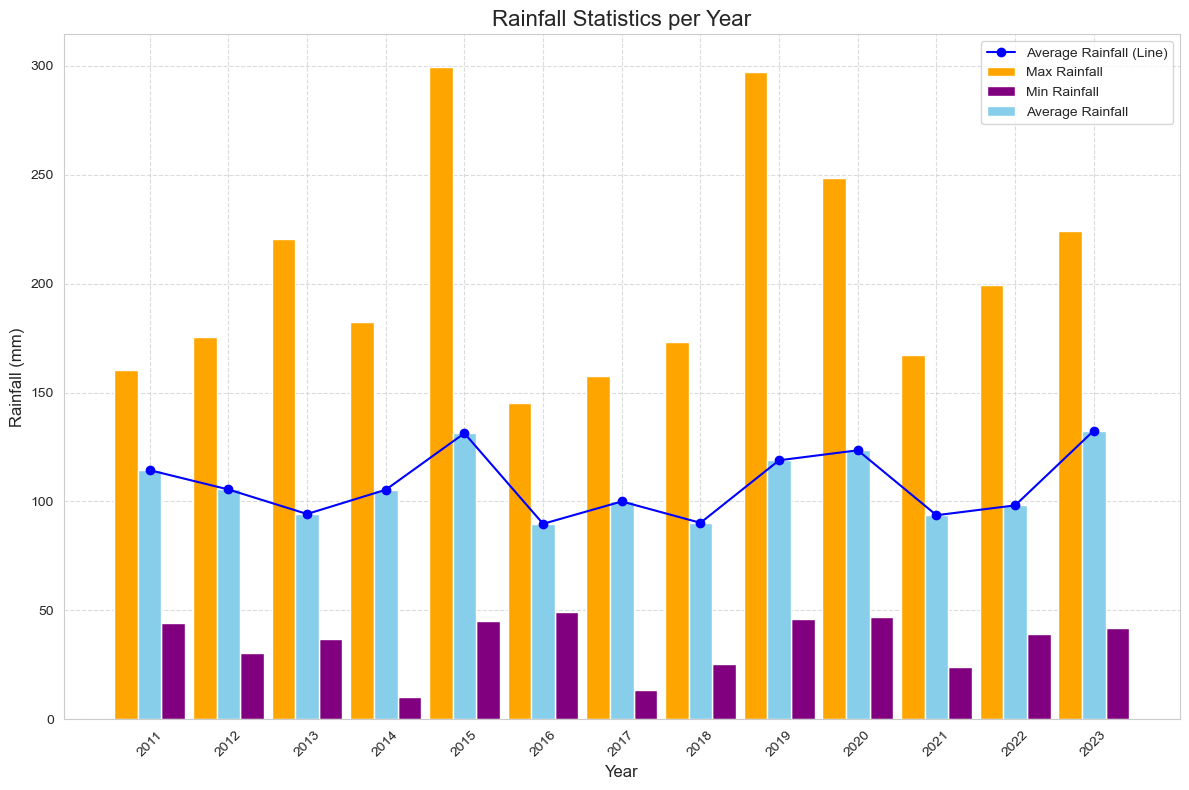

In [287]:
# Plot.
plt.figure(figsize=(12, 8))  # Set the figure size.

# Bar chart for max rainfall.
plt.bar(rainfall_stats['year'] - 0.3, rainfall_stats['max'], width=0.3, color='orange', label='Max Rainfall')

# Bar chart for min rainfall.
plt.bar(rainfall_stats['year'] + 0.3, rainfall_stats['min'], width=0.3, color='purple', label='Min Rainfall')

# Bar chart for average rainfall.
plt.bar(rainfall_stats['year'], rainfall_stats['mean'], width=0.3, color='skyblue', label='Average Rainfall')

# Line chart for average rainfall.
plt.plot(rainfall_stats['year'], rainfall_stats['mean'], marker='o', color='blue', linestyle='-', label='Average Rainfall (Line)')

# Title and labels.
plt.title('Rainfall Statistics per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rainfall (mm)', fontsize=12)

# X-axis.
plt.xticks(rainfall_stats['year'], rotation=45)

# Legend.
plt.legend()

# Add a grid for better visualization.
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Adjust layout and display the plot.
plt.tight_layout()
plt.show()

At the previous three figures we have looked at the yearly average mean, max and min statistics for rainfall, windspeed and temperature for Athenry in the Republic of Ireland.
Let's contrast rainfall and temperature with London.

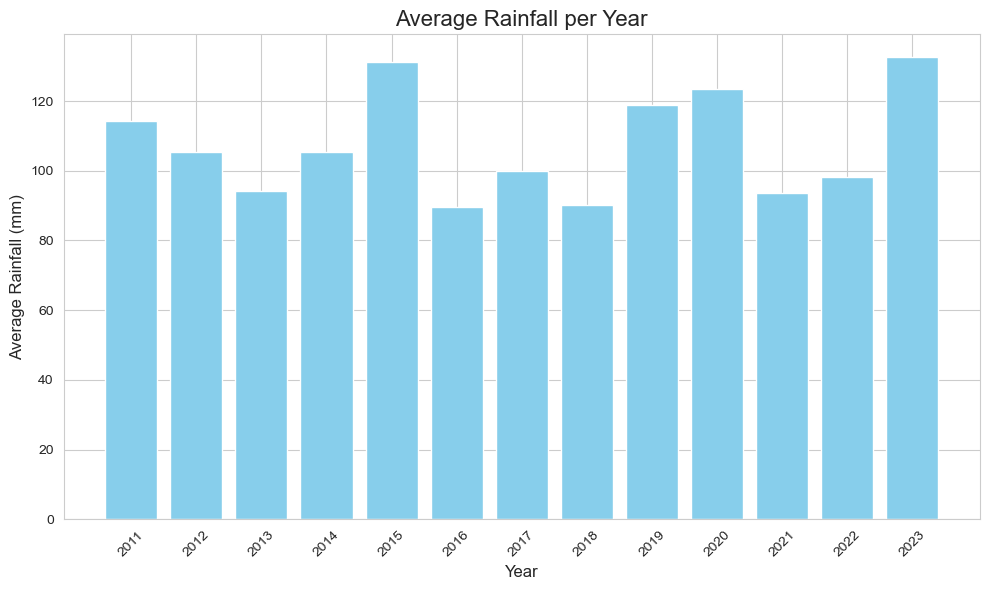

In [288]:
# Plot the bar chart for all years.
plt.figure(figsize=(10, 6))  # Set the figure size.
plt.bar(avg_rainfall_per_year['year'], avg_rainfall_per_year['rain'], color='skyblue')

# Title and labels.
plt.title('Average Rainfall per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rainfall (mm)', fontsize=12)
plt.xticks(avg_rainfall_per_year['year'], rotation=45)  # Rotate x-axis labels for better readability.

# Plot.
plt.tight_layout()
plt.show()

Average rainfall per year oscillates between under 100 mm in some years to way over 120 mm in other years. Let's have a look at the minimum and maximum averages per year.

## 7.0 London weather.
### 7.1 Load the dataset.
The dataset is loaded from the local location specified by the *file_path2* variable using *pandas.read_csv()*.
Datasource is https://github.com/pc1991/London-Weather-Data-From-1979-To-2023/tree/main?tab=readme-ov-file.

In [289]:
file_path2 = r"C:\Users\User\ATU\PFDA\Project\london_weather_data_1979_to_2023.csv"
df2 = pd.read_csv(file_path2, on_bad_lines='skip')


### 7.2 Inspect the dataset.

In [290]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16436 entries, 0 to 16435
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    16436 non-null  int64  
 1   TX      16436 non-null  float64
 2   Q_TX    16436 non-null  int64  
 3   TN      16436 non-null  float64
 4   Q_TN    16436 non-null  int64  
 5   TG      16407 non-null  float64
 6   Q_TG    16436 non-null  int64  
 7   SS      16436 non-null  float64
 8   Q_SS    16436 non-null  int64  
 9   SD      15361 non-null  float64
 10  Q_SD    16436 non-null  int64  
 11  RR      16436 non-null  float64
 12  Q_RR    16436 non-null  int64  
 13  QQ      16411 non-null  float64
 14  Q_QQ    16436 non-null  int64  
 15  PP      16432 non-null  float64
 16  Q_PP    16436 non-null  int64  
 17  HU      16379 non-null  float64
 18  Q_HU    16436 non-null  int64  
 19  CC      16418 non-null  float64
 20  Q_CC    16436 non-null  int64  
dtypes: float64(10), int64(11)
memory us

In [291]:
print(df2.columns)

print(df2.head(40))

Index(['DATE', 'TX', 'Q_TX', 'TN', 'Q_TN', 'TG', 'Q_TG', 'SS', 'Q_SS', 'SD',
       'Q_SD', 'RR', 'Q_RR', 'QQ', 'Q_QQ', 'PP', 'Q_PP', 'HU', 'Q_HU', 'CC',
       'Q_CC'],
      dtype='object')
        DATE    TX  Q_TX    TN  Q_TN    TG  Q_TG    SS  Q_SS   SD  ...     RR  \
0   19790101  23.0     0 -75.0     0 -41.0     0  70.0     0  9.0  ...    4.0   
1   19790102  16.0     0 -75.0     0 -26.0     0  17.0     0  8.0  ...    0.0   
2   19790103  13.0     0 -72.0     0 -28.0     0   0.0     0  4.0  ...    0.0   
3   19790104  -3.0     0 -65.0     0 -26.0     0   0.0     0  2.0  ...    0.0   
4   19790105  56.0     0 -14.0     0  -8.0     0  20.0     0  1.0  ...    0.0   
5   19790106  83.0     0 -66.0     0  -5.0     0  38.0     0  1.0  ...    7.0   
6   19790107  85.0     0 -53.0     0  15.0     0   0.0     0  0.0  ...   52.0   
7   19790108  58.0     1  53.0     0  69.0     1   1.0     0  0.0  ...    8.0   
8   19790109  52.0     0  16.0     0  37.0     0  58.0     0  0.0  ...   72.0  

In [292]:
print(df2.tail(25))

           DATE     TX  Q_TX     TN  Q_TN     TG  Q_TG    SS  Q_SS   SD  ...  \
16411  20231207  118.0     0   13.0     0   51.0     0   0.0     0  0.0  ...   
16412  20231208  134.0     0   57.0     0   88.0     0  36.0     0  0.0  ...   
16413  20231209  125.0     0   76.0     0  105.0     0   9.0     0  0.0  ...   
16414  20231210  115.0     0   75.0     0  100.0     0   5.0     0  0.0  ...   
16415  20231211  116.0     0   88.0     0  102.0     0  17.0     0  0.0  ...   
16416  20231212   82.0     1   62.0     0   89.0     1  10.0     0  0.0  ...   
16417  20231213   85.0     0   76.0     0   79.0     0   0.0     0  0.0  ...   
16418  20231214  105.0     0   25.0     0   55.0     0   0.0     0  0.0  ...   
16419  20231215  115.0     0   40.0     0   72.0     0   0.0     0  0.0  ...   
16420  20231216  121.0     0   55.0     0   85.0     0   0.0     0  0.0  ...   
16421  20231217  128.0     0   93.0     0  107.0     0  16.0     0  0.0  ...   
16422  20231218  123.0     0   93.0     

### 7.3 Normalize the dataset.
We have gathered a lot of useful information about the dataset. For example the dataset start on 01.01.1979 and ends on 31.12.2024, also it has a total of 21 columns made up of the following datatypes: datetime64[ns](1), float64(10), int64(10). It also contains a column RR representing the daily precipitation averages. This is the column we will now contrast with the rainfall data of Athenry.

In [293]:
df2['DATE'] = pd.to_datetime(df2['DATE'], format='%Y%m%d') 
print(df2.head(10))

        DATE    TX  Q_TX    TN  Q_TN    TG  Q_TG    SS  Q_SS   SD  ...    RR  \
0 1979-01-01  23.0     0 -75.0     0 -41.0     0  70.0     0  9.0  ...   4.0   
1 1979-01-02  16.0     0 -75.0     0 -26.0     0  17.0     0  8.0  ...   0.0   
2 1979-01-03  13.0     0 -72.0     0 -28.0     0   0.0     0  4.0  ...   0.0   
3 1979-01-04  -3.0     0 -65.0     0 -26.0     0   0.0     0  2.0  ...   0.0   
4 1979-01-05  56.0     0 -14.0     0  -8.0     0  20.0     0  1.0  ...   0.0   
5 1979-01-06  83.0     0 -66.0     0  -5.0     0  38.0     0  1.0  ...   7.0   
6 1979-01-07  85.0     0 -53.0     0  15.0     0   0.0     0  0.0  ...  52.0   
7 1979-01-08  58.0     1  53.0     0  69.0     1   1.0     0  0.0  ...   8.0   
8 1979-01-09  52.0     0  16.0     0  37.0     0  58.0     0  0.0  ...  72.0   
9 1979-01-10  49.0     0  14.0     0  33.0     0  19.0     0  0.0  ...  21.0   

   Q_RR    QQ  Q_QQ       PP  Q_PP    HU  Q_HU   CC  Q_CC  
0     0  52.0     0  10190.0     0  83.0     0  2.0     0  

In [294]:
print(df2.tail(10))

            DATE     TX  Q_TX     TN  Q_TN     TG  Q_TG    SS  Q_SS   SD  ...  \
16426 2023-12-22  136.0     0   88.0     0  107.0     0   0.0     0  0.0  ...   
16427 2023-12-23  153.0     0   84.0     0  110.0     0  12.0     0  0.0  ...   
16428 2023-12-24  129.0     0  102.0     0  128.0     0   0.0     0  0.0  ...   
16429 2023-12-25  121.0     1  116.0     0  122.0     1   0.0     0  0.0  ...   
16430 2023-12-26  124.0     0   62.0     0   92.0     0  12.0     0  0.0  ...   
16431 2023-12-27  126.0     0   55.0     0   89.0     0   0.0     0  0.0  ...   
16432 2023-12-28  119.0     0   97.0     0  112.0     0   2.0     0  0.0  ...   
16433 2023-12-29  122.0     0   92.0     0  106.0     0   7.0     0  0.0  ...   
16434 2023-12-30  107.0     0   56.0     0   89.0     0   0.0     0  0.0  ...   
16435 2023-12-31  124.0     0   57.0     0   82.0     0   5.0     0  0.0  ...   

         RR  Q_RR    QQ  Q_QQ       PP  Q_PP    HU  Q_HU   CC  Q_CC  
16426   0.0     0  12.0     0  10131.0

We'll drop all date values beyond 01.01.2011 and 31.12.2023:

In [295]:
# Filter the DataFrame for dates between 2011-01-01 and 2023-12-31.
start_date = '2011-01-01'
end_date = '2023-12-31'
df2_filtered = df2[(df2['DATE'] >= start_date) & (df2['DATE'] <= end_date)] 

print(df2_filtered.head(25))

            DATE     TX  Q_TX     TN  Q_TN     TG  Q_TG    SS  Q_SS   SD  ...  \
11688 2011-01-01   40.0     1   46.0     1   59.0     1   0.0     0  0.0  ...   
11689 2011-01-02   29.0     1   19.0     0   30.0     1   1.0     0  0.0  ...   
11690 2011-01-03   60.0     0   -3.0     0   13.0     0   1.0     0  0.0  ...   
11691 2011-01-04   71.0     0   -3.0     0   29.0     0   0.0     0  NaN  ...   
11692 2011-01-05   51.0     0   13.0     0   42.0     0  23.0     0  0.0  ...   
11693 2011-01-06  110.0     0   39.0     0   45.0     0   0.0     0  NaN  ...   
11694 2011-01-07  100.0     0   10.0     0   60.0     0   0.0     0  0.0  ...   
11695 2011-01-08   72.0     0   39.0     0   70.0     0  18.0     0  0.0  ...   
11696 2011-01-09   89.0     0    9.0     0   41.0     0  67.0     0  0.0  ...   
11697 2011-01-10   87.0     0  -19.0     0   35.0     0   3.0     0  0.0  ...   
11698 2011-01-11  129.0     0   48.0     0   68.0     0   1.0     0  0.0  ...   
11699 2011-01-12  137.0     

Next we'll create another dataframe that on;y contains the relevant columns for this project: 'DATE' between 2011-01-01 and 2023-12-31 and 'RR' for the precipitation data:

In [296]:
df2_filtered = df2_filtered[['DATE', 'RR']]
print(df2_filtered.head(25))

            DATE     RR
11688 2011-01-01    6.0
11689 2011-01-02    0.0
11690 2011-01-03    0.0
11691 2011-01-04    0.0
11692 2011-01-05   10.0
11693 2011-01-06  110.0
11694 2011-01-07  136.0
11695 2011-01-08    2.0
11696 2011-01-09    2.0
11697 2011-01-10   70.0
11698 2011-01-11   60.0
11699 2011-01-12    4.0
11700 2011-01-13   10.0
11701 2011-01-14   72.0
11702 2011-01-15    0.0
11703 2011-01-16   84.0
11704 2011-01-17  176.0
11705 2011-01-18    0.0
11706 2011-01-19    2.0
11707 2011-01-20    0.0
11708 2011-01-21    2.0
11709 2011-01-22    2.0
11710 2011-01-23    8.0
11711 2011-01-24    6.0
11712 2011-01-25    4.0


Last we calculate the yearly averages which are to be multiplied by 10 as the soucre data is represented in 0.1 mm.

In [297]:
yearly_avg_rr = df2_filtered.groupby(df2_filtered['DATE'].dt.year)['RR'].mean() *10 # Multiply by 10 as source data is 0.1 mm.

# Create a new DataFrame with the results
yearly_avg_df2_filtered = pd.DataFrame({'year': yearly_avg_rr.index, 'avg_rr': yearly_avg_rr.values})

print(yearly_avg_df2_filtered) 

    year      avg_rr
0   2011  139.506849
1   2012  193.278689
2   2013  153.452055
3   2014  236.712329
4   2015  153.972603
5   2016  161.366120
6   2017  156.767123
7   2018  158.904110
8   2019  178.684932
9   2020  181.038251
10  2021  181.479452
11  2022  158.301370
12  2023  208.767123


### 7.4 Plot London rainfall averages.

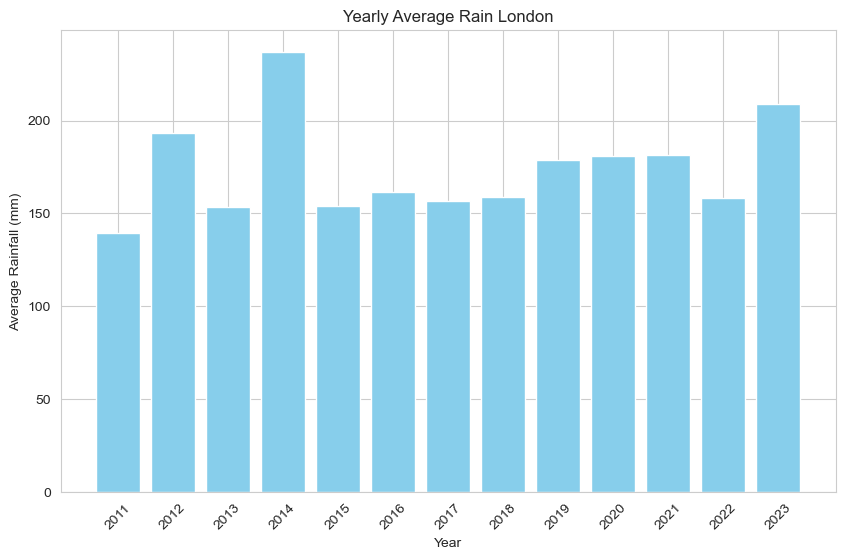

In [298]:
yearly_avg_rr = df2_filtered.groupby(df2_filtered['DATE'].dt.year)['RR'].mean() *10 # Multiply by 10 as source data is 0.1 mm.

# Create a new DataFrame with the results.
yearly_avg_df2_filtered = pd.DataFrame({'year': yearly_avg_rr.index, 'avg_rr': yearly_avg_rr.values})

# Create bar chart.
plt.figure(figsize=(10, 6))
plt.bar(yearly_avg_df2_filtered['year'], yearly_avg_df2_filtered['avg_rr'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Rainfall (mm)')
plt.title('Yearly Average Rain London')
plt.xticks(yearly_avg_df2_filtered['year'], rotation=45) 
plt.show()

## 8.0 Contrast Athenry rainfall vs. London.
### 8.1 Plot.

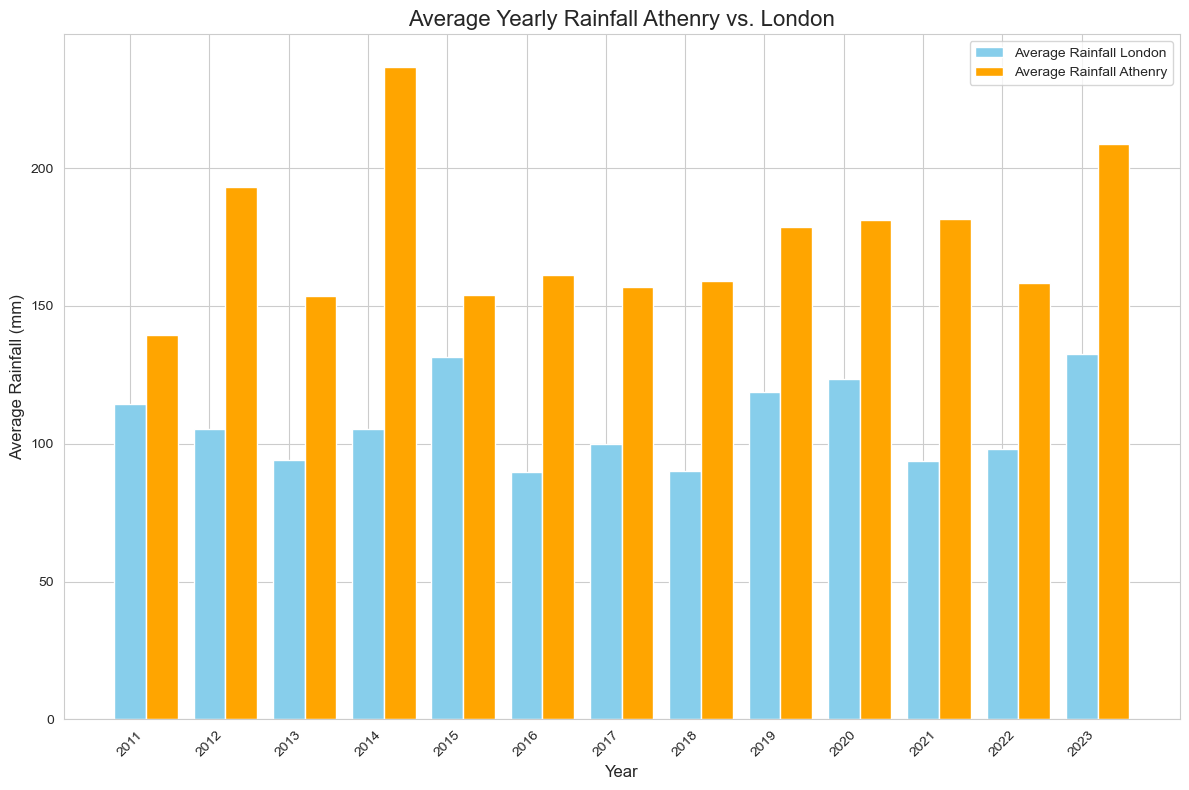

In [299]:
# Combine two bar charts into one plot.
plt.figure(figsize=(12, 8))  # Set the figure size.

# Yearly average rainfall per year London.
plt.bar(avg_rainfall_per_year['year'], avg_rainfall_per_year['rain'], 
        color='skyblue', width=0.4, label='Average Rainfall London')

# Yearly average rainfall Athenry.
plt.bar(yearly_avg_df2_filtered['year'] + 0.4, yearly_avg_df2_filtered['avg_rr'], 
        color='orange', width=0.4, label='Average Rainfall Athenry')

# Title and labels.
plt.title('Average Yearly Rainfall Athenry vs. London', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rainfall (mm)', fontsize=12)

# Add x-axis ticks.
plt.xticks(avg_rainfall_per_year['year'], rotation=45)

# Add a legend.
plt.legend()

# Adjust layout for better visualization.
plt.tight_layout()

# Plot.
plt.show()

'rain' is an object what means that we will have to normalize the data further.

In [300]:
# Convert to numeric, handle missing values.
df.loc['rain'] = pd.to_numeric(df['rain'], errors='coerce') 
mean_rain = df['rain'].mean() 
df['rain'] = df['rain'].fillna(mean_rain) 

# Verify data types.
print(df.dtypes)

year     float64
month    float64
meant    float64
maxtp    float64
mintp    float64
mnmax    float64
mnmin    float64
rain     float64
gmin      object
wdsp     float64
maxgt    float64
sun       object
dtype: object


C:\Users\User\AppData\Local\Temp\ipykernel_11124\1821618545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc['rain'] = pd.to_numeric(df['rain'], errors='coerce')
C:\Users\User\AppData\Local\Temp\ipykernel_11124\1821618545.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rain'] = df['rain'].fillna(mean_rain)
C:\Users\User\AppData\Local\Temp\ipykernel_11124\1821618545.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

### 9.0 Further analysis.
We will analyze the metrics of average rainfall, temperature, and wind speed to determine if there is any correlation among them

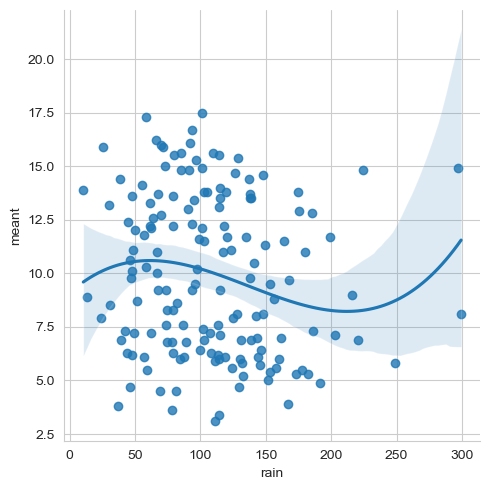

In [301]:
# Set style.
sns.set_style('whitegrid')
#sns.scatterplot(x='wdsp',y='meant',data=df)
#sns.regplot(x='wdsp', y='meant', order=3, data=df)
sns.lmplot(x='rain', y='meant', order=3, data=df)

plt.show()

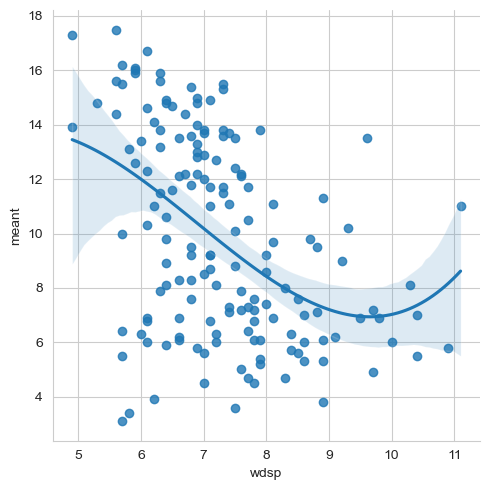

In [302]:
# Set style.
sns.set_style('whitegrid')
#sns.scatterplot(x='wdsp',y='meant',data=df)
#sns.regplot(x='wdsp', y='meant', order=3, data=df)
sns.lmplot(x='wdsp', y='meant', order=3, data=df)

plt.show()

In [303]:
print(df[['wdsp', 'rain', 'meant']].dtypes)
print(df[['wdsp', 'rain', 'meant']].isna().sum())
print(df[['wdsp', 'rain', 'meant']].info())



wdsp     float64
rain     float64
meant    float64
dtype: object
wdsp     1
rain     0
meant    1
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 10 to rain
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wdsp    156 non-null    float64
 1   rain    157 non-null    float64
 2   meant   156 non-null    float64
dtypes: float64(3)
memory usage: 9.0+ KB
None


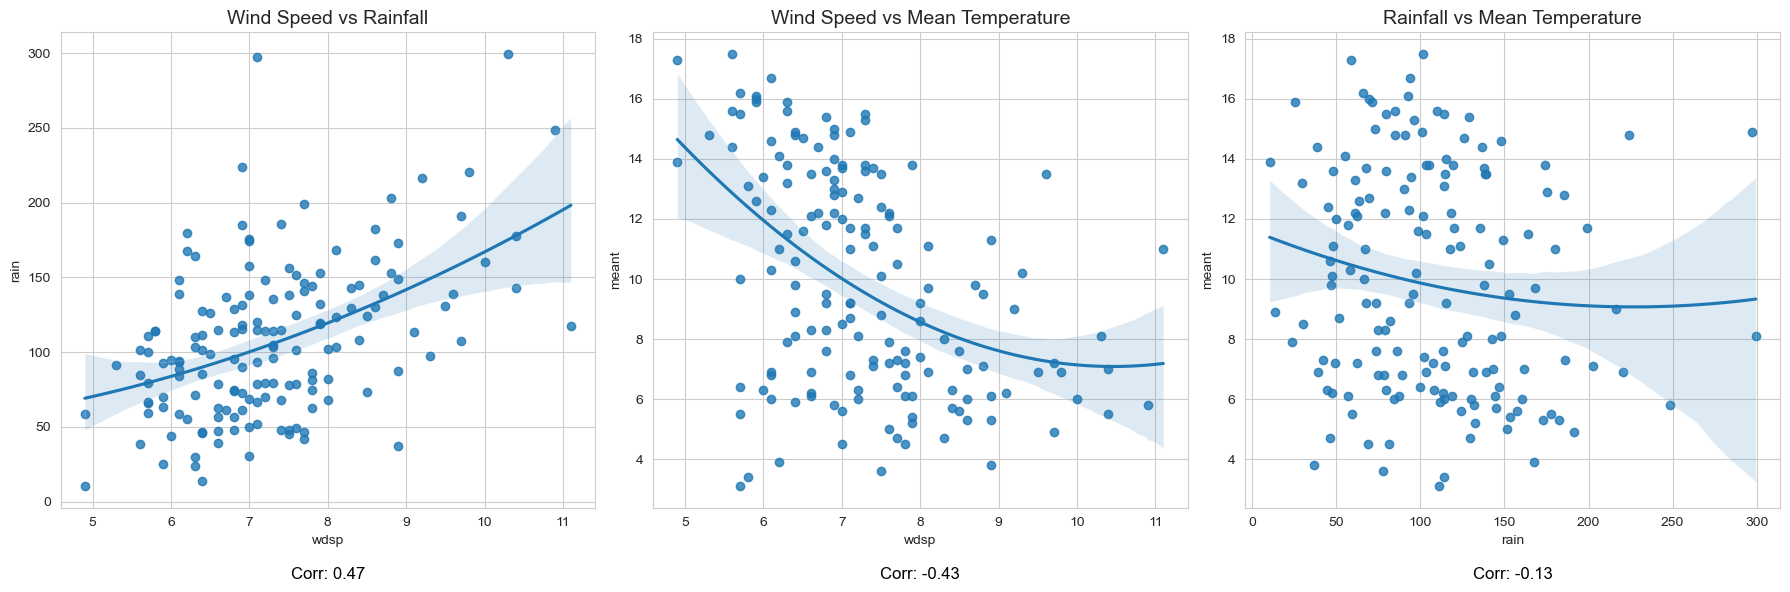

In [304]:
# Ensure columns are numeric.
df.loc[:, 'wdsp'] = pd.to_numeric(df['wdsp'], errors='coerce')
df.loc[:, 'rain'] = pd.to_numeric(df['rain'], errors='coerce')
df.loc[:, 'meant'] = pd.to_numeric(df['meant'], errors='coerce')
df[pd.to_numeric(df['rain'], errors='coerce').isna()]

# Handle missing values, drop rows with NaNs etc.
df = df.dropna(subset=['wdsp', 'rain', 'meant'])
df.loc[:, 'rain'] = pd.to_numeric(df['rain'], errors='coerce')

# Set style.
sns.set_style('whitegrid')

# Create a figure with 3 subplots in a single row.
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

plots = [
    ('wdsp', 'rain', 'Wind Speed vs Rainfall'),
    ('wdsp', 'meant', 'Wind Speed vs Mean Temperature'),
    ('rain', 'meant', 'Rainfall vs Mean Temperature'),
]

# Loop over the axes and data.
for ax, (x, y, title) in zip(axes, plots):
    # Scatter plot with regression line.
    sns.regplot(x=x, y=y, data=df, order=2, ax=ax)
    ax.set_title(title, fontsize=14)
    
    # Calculate and display correlation coefficient.
    corr_coef = np.corrcoef(df[x].dropna(), df[y].dropna())[0, 1]
    ax.annotate(f'Corr: {corr_coef:.2f}', xy=(0.5, -0.15), xycoords='axes fraction', 
                ha='center', fontsize=12, color='black')

# Adjust layout.
plt.tight_layout()
plt.show()


In [305]:
# Group by year and calculate average, max, and min windspeed.
wdsp_stats = df.groupby('year')['wdsp'].agg(['mean', 'max', 'min']).reset_index()

# Print the numeric output for each year's windspeed statistics.
print("Windspeed Statistics per Year:")
print(wdsp_stats)

Windspeed Statistics per Year:
      year      mean   max  min
0   2011.0  7.866667  11.1  5.7
1   2012.0  7.458333   9.5  6.4
2   2013.0  7.691667   9.8  5.6
3   2014.0  7.325000  10.4  4.9
4   2015.0  7.808333  10.3  5.7
5   2016.0  7.025000   8.4  5.7
6   2017.0  7.158333   8.9  6.1
7   2018.0  7.150000   8.9  5.9
8   2019.0  7.200000   8.6  6.1
9   2020.0  7.591667  10.9  6.3
10  2021.0  6.566667   9.1  4.9
11  2022.0  6.983333  10.4  5.7
12  2023.0  6.916667   8.8  5.9


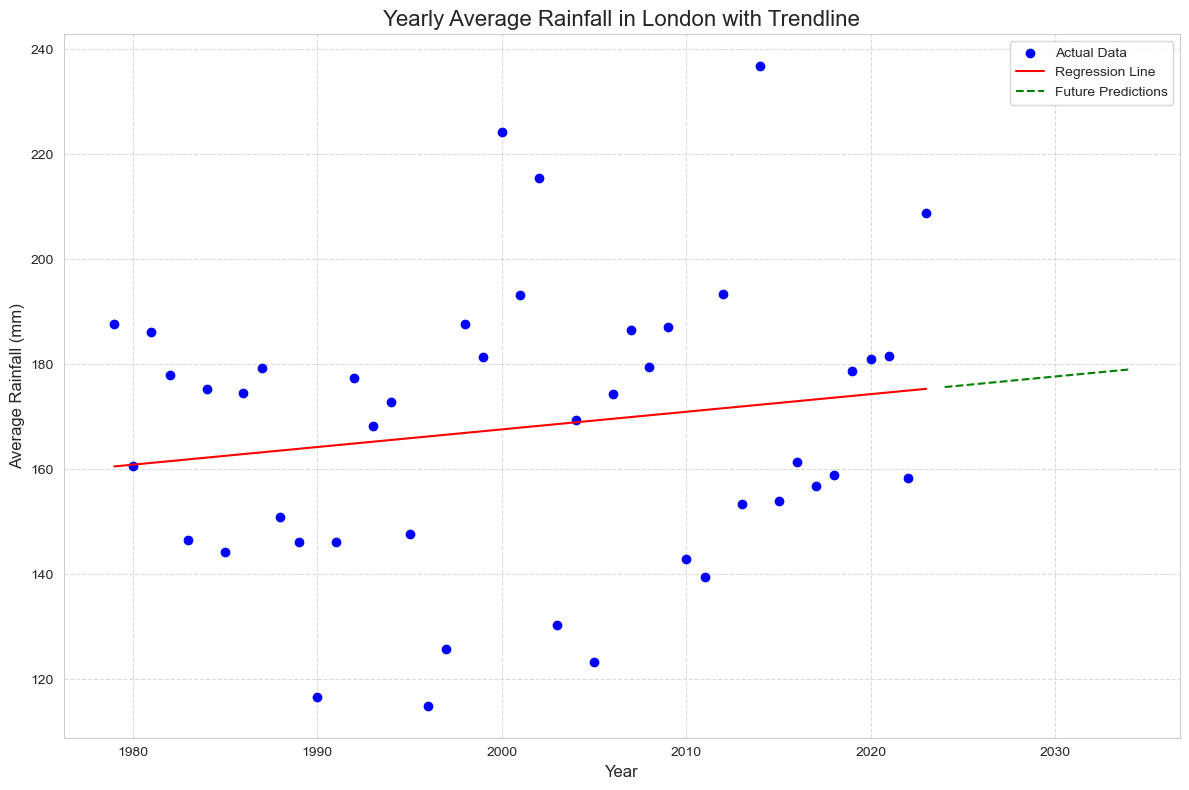

In [311]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load the dataset
file_path2 = r"C:\Users\User\ATU\PFDA\Project\london_weather_data_1979_to_2023.csv"
df2 = pd.read_csv(file_path2)

# Ensure 'RR' is numeric and scale it from 0.1 mm to mm
df2['RR'] = pd.to_numeric(df2['RR'], errors='coerce') * 10

# Extract year from the DATE column
df2['DATE'] = pd.to_datetime(df2['DATE'], format='%Y%m%d')
df2['year'] = df2['DATE'].dt.year

# Calculate yearly average rainfall
yearly_avg_rr = df2.groupby('year')['RR'].mean().reset_index()

# Prepare data for regression
X = yearly_avg_rr[['year']]
y = yearly_avg_rr['RR']

# Linear regression
model = LinearRegression()
model.fit(X, y)

# Predict future values for visualization
future_years = pd.DataFrame({'year': range(2024, 2035)})
future_predictions = model.predict(future_years)

# Plot actual data and regression
plt.figure(figsize=(12, 8))
plt.scatter(X, y, label='Actual Data', color='blue')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.plot(future_years['year'], future_predictions, color='green', linestyle='--', label='Future Predictions')

# Add labels and legend
plt.title('Yearly Average Rainfall in London with Trendline', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rainfall (mm)', fontsize=12)
plt.legend()
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isin.html